## How to Detect Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
array1 = np.random.randn(20)
array1

array([ 0.77675412, -0.98120228, -0.81606165, -0.15990426, -0.0564483 ,
        1.19229497,  1.12827426, -2.29816401, -1.57635216,  2.44486654,
        1.38235266, -0.54769881,  0.09327141, -1.7888019 ,  0.95000169,
       -1.02411261, -0.73296105, -0.46491096,  1.80410536,  0.59625289])

In [3]:
array2 = np.array([23, 26, 11, 25, 27, 210, 25, 17, 13, 18, 29, 25, 220, 29, 16, 23, 180,13, 14, 27])
array2

array([ 23,  26,  11,  25,  27, 210,  25,  17,  13,  18,  29,  25, 220,
        29,  16,  23, 180,  13,  14,  27])

<AxesSubplot:ylabel='Density'>

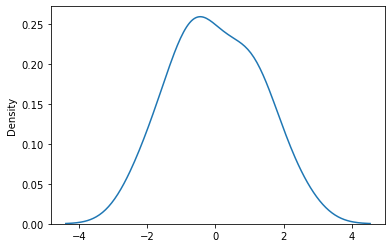

In [8]:
sns.kdeplot(array1,fill=False)

<AxesSubplot:ylabel='Density'>

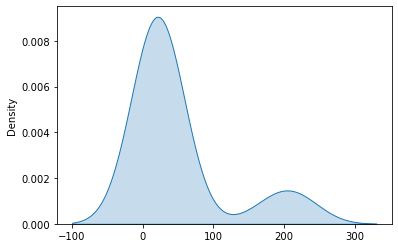

In [13]:
sns.kdeplot(array2,fill=True)

In [14]:
from scipy.stats import shapiro

In [15]:
a,p_val = shapiro(array1)
print('P_value :', p_val)
if p_val > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not Normally distributed')

P_value : 0.3697771430015564
Data is normally distributed


In [16]:
a,p_val = shapiro(array2)
print('P_value :', p_val)
if p_val > 0.05:
    print('Data is normally distributed')
else:
    print('Data is not Normally distributed')

P_value : 5.602054784503707e-07
Data is not Normally distributed


## 1. Z-score

In [ ]:
When data distribution is normal
Most values of lies around mean
std = how far away is our datapoint from mean
z-score = how far the datapoint is from std.
Outlier treatment:
    1) trimming(drop)
    2) imputation(capping)
    

In [18]:
array1 = np.random.randint(10,30, size =20)
array1

array([25, 22, 20, 14, 11, 12, 15, 21, 11, 13, 11, 25, 27, 23, 13, 25, 20,
       16, 15, 23])

In [19]:
array2 = np.array([23, 26, 11, 25, 27, 210, 25, 17, 13, 18, 29, 25, 220, 29, 16, 23, 180,13, 14, 27])
array2

array([ 23,  26,  11,  25,  27, 210,  25,  17,  13,  18,  29,  25, 220,
        29,  16,  23, 180,  13,  14,  27])

In [ ]:
# standardization

z-score = (x- x_mean)/std
x= datapoint
x_mean=mean value
std = standard deviation

In [29]:
print(array1)
mean = np.mean(array1)
std = np.std(array1)
print(f'Mean == {mean}, Std == {std}')

threshold = 2
outliers_list=[]

for x_val in array1:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are :', outliers_list)

[25 22 20 14 11 12 15 21 11 13 11 25 27 23 13 25 20 16 15 23]
Mean == 18.1, Std == 5.3935146240647205
25 >> 1.27931422846499
22 >> 0.723090650871516
20 >> 0.3522749324758666
14 >> 0.7601722227110814
11 >> 1.3163958003045555
12 >> 1.1309879411067307
15 >> 0.5747643635132568
21 >> 0.5376827916736913
11 >> 1.3163958003045555
13 >> 0.9455800819089061
11 >> 1.3163958003045555
25 >> 1.27931422846499
27 >> 1.6501299468606394
23 >> 0.9084985100693407
13 >> 0.9455800819089061
25 >> 1.27931422846499
20 >> 0.3522749324758666
16 >> 0.38935650431543206
15 >> 0.5747643635132568
23 >> 0.9084985100693407
Outliers are : []


In [28]:
print(array2)
mean = np.mean(array2)
std = np.std(array2)
print(f'Mean == {mean}, Std == {std}')

threshold = 2
outliers_list=[]

for x_val in array2:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
    print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)
        
print('Outliers are :', outliers_list)

[ 23  26  11  25  27 210  25  17  13  18  29  25 220  29  16  23 180  13
  14  27]
Mean == 48.55, Std == 65.58618375847156
23 >> 0.38956375467874027
26 >> 0.3438224136205712
11 >> 0.5725291189114168
25 >> 0.35906952730662756
27 >> 0.3285752999345148
210 >> 2.4616465046138014
25 >> 0.35906952730662756
17 >> 0.4810464367950785
13 >> 0.5420348915393041
18 >> 0.46579932310902217
29 >> 0.29808107256240207
25 >> 0.35906952730662756
220 >> 2.614117641474365
29 >> 0.29808107256240207
16 >> 0.4962935504811349
23 >> 0.38956375467874027
180 >> 2.0042330940321103
13 >> 0.5420348915393041
14 >> 0.5267877778532477
27 >> 0.3285752999345148
Outliers are : [210, 220, 180]


In [ ]:
11 = 48.55 - z * (65.58)
z= 11-48.55/65.58

In [30]:
(11-48.55)/65.58

-0.5725831046050625

In [32]:
48.55+(2*65.58)

179.70999999999998

## 2. IQR(Inter Quartile Range)

In [ ]:
Use when data is not normally distributed(skewed)

Percentile : how many percentage of data is below the value
    
ex. 
Age = 34 36 23 16 43 25 30 28 41 38
100 % (percentile)= 43 (all the values are below 43)
0 % =16 (all the values are greater than 0)

In [ ]:
25% = 23 (25 % data is lesser than 23)
50% = 36 (50% data is lesser than 36)

In [ ]:
Boxplot:
    median(Q2/50% percentile):
        the middle value of dataset
        
    1st quartile(Q1/25% percentile):
        middle no. between smallest and median
        
    3rd quartile(Q3/75% percentile):
        middle no. between median and highest value
        
    InterQuartilRange(IQR):
        25% to 75%
        
        23,  26,  11,  25,  27, 210,  25,  17,  13,  18,  29,  25, 220, 29,  16,  23, 180,  13,  14,  27
        
        maximum : Q3 + 1.5* IQR
        
        minimum: Q1 - 1.5* IQR
        

In [33]:
array1 = np.random.randint(10,30, size =20)
array1

array([12, 21, 12, 15, 19, 13, 29, 11, 28, 17, 26, 12, 11, 25, 11, 16, 24,
       14, 12, 20])

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

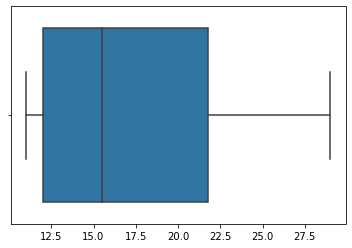

In [34]:
sns.boxplot(array1)

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

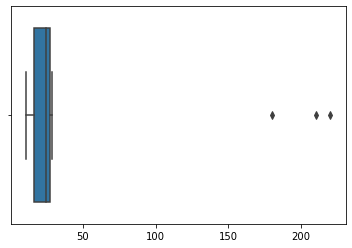

In [35]:
sns.boxplot(array2)